In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [8]:
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  5<sup>th</sup> September, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [36]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [37]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [10]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- Wall Street closed in the red on Friday in a wild session to extend Thursday’s sharp declines, as the tech rout continued on valuation concerns. On the macro side, the US economy added 1.37 million new jobs in August, roughly in line with forecasts; while the jobless rate fell to 8.4% from 10.2%. On the pandemic front, a new forecast from the Institute for Health Metrics and Evaluation at the University of Washington now predicts the US will top more than 410 thousand deaths by the end of the year.


- Shares of vaccine developer Moderna fell after the announcement of slower clinical trial enrollment. The Dow Jones lost 159 points or 0.6% to 28,133. The S&P 500 dropped 28 points or 0.8% to 3,427. The Nasdaq retreated 145 points or 1.3% to 11,313. During the week, the Dow Jones lost 1.8%, the S&P 500 shed 2.3% and the Nasdaq declined 3.3%, the most since March. Markets will be closed on Monday for the Labor Day holiday.


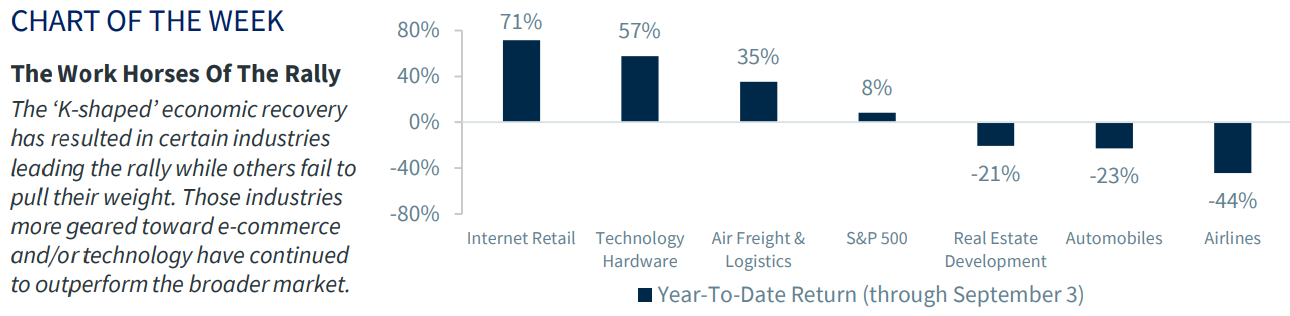



- After the **S&P 500 added Etsy Inc. (NASDAQ: ETSY), Teradyne Inc (NASDAQ: TER) and Catalent (NYSE: CTLT) on Friday evening**, the lack of a Tesla announcement sent shares sinking. While it won't affect day to day operations at Tesla, it could hurt the share price. **Tesla's stock was down 6.3% to USD 392 per share in Friday's after-hours session. Shares of Etsy jumped 6% in extended trade, Teradyne rose 2%, and Catalent added 2%.**

-  Soaring open interest, particularly in bullish call contracts, are visible in virtually all the stocks that have led the rally, from Salesforce to Apple Inc. and Tesla Inc. What’s spurring the surge is a question that started to obsess Wall Street, climaxing Friday in speculation that buying by a single money pool was responsible for much of it. **Bloomberg reported on Aug. 11 that SoftBank had been targeting wagers of more than USD 10 billion -- potentially even tens of billions of dollars -- in public stocks using financing structures that can prevent it from showing up in public records as a direct shareholder.** The Wall Street Journal and Financial Times reported Friday that purchases of bullish options by SoftBank on billions of dollars worth of stock amplified this summer’s rally in technology companies.


- Jason Goepfert, president of Sundial Capital Research, says that **while SoftBank may be the biggest player, it can’t be just one firm whipping up markets. Small day traders have spent USD 40 billion in call premiums in a month, data he compiled from the Options Clearing Corp. show.** That’s a hefty amount for retail investors to be wielding and dwarfs what SoftBank is reported to have spent.


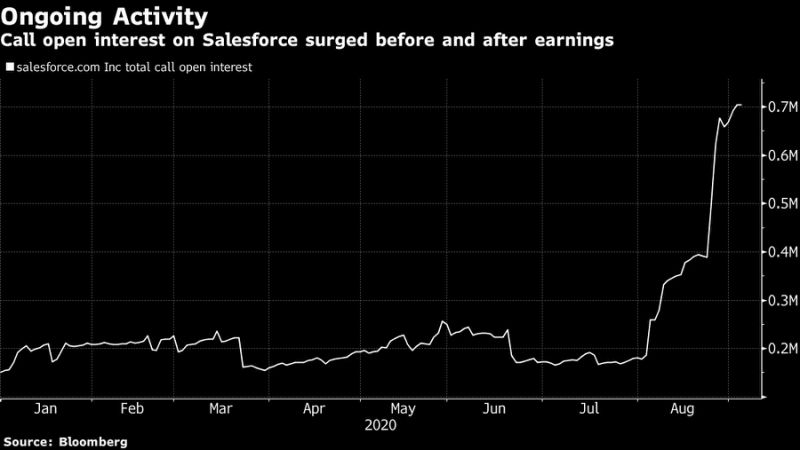




- There is reason for more optimism at **Macy’s**. The department-store giant on Wednesday reported USD 3.6 billion in sales in its recent quarter, up from USD 3 billion in the previous quarter, and a quarterly loss of USD 431 million. Interim Chief Financial Officer Felicia Williams said the results were stronger than anticipated, as digital sales improved, stores recovered faster than planned, and sales of luxury goods outpaced expectations.


- **Amazon Prime, meet Walmart+.** On Sept. 15, the retail giant will launch Walmart+, a USD 98-a-year membership that includes free grocery delivery, a discount on gas from Walmart parking lots and the ability to check out via a mobile phone in stores. The new offering is Walmart’s latest attempt to build a membership program that can rival Amazon.com Inc.’s Prime service. In 2017, Walmart scrapped a previous attempt at a membership program called ShippingPass, which offered free shipping on Walmart.com orders. Shares gained 6.3% Tuesday.


- **Brazil**’s Ibovepa gained 520 points or 0.5% to 101,242 on Friday. On the domestic side, new auto sales climbed 5.1%. Meanwhile, Economy Ministry updated its fiscal projections for this year, forecasting a primary budget gap of 12.1% of the GDP compared with a previous estimate of a shortfall of 11% of GDP. On Thursday, Brazil's government presented a constitutional reform bill aimed at simplifying and reducing public sector jobs and bodies without congressional approval. During the week, the Ibovespa declined 0.9%.


- **Mexico**’s IPC gained 19 points or 0.1% to 36,449 as domestic macro indicators outweighed a wild session for US equities, still dragged by a correction in the tech sector. On Friday, data showed the consumer confidence index rose for the third month in a row in August. Meanwhile, Mexico's auto exports fell 8.6 percent year-on-year to 257,610 units in August 2020, following a 5.5 percent drop in the previous month. During the week, the IPC declined 3.5%.


- **Canada**’s TSX index shed 219 points or 1.3% to 16,230 on Friday, as a rout in the US tech sector outweighed higher than expected job creation. On the macro side, jobs figures showed Canada added 245,800 jobs in August, while the jobless rate dropped to 10.2% from 10.9% in July. During the week, the TSX declined 2.8%, the most since June.


- The past week focus mainly on PMI data which continue to display unevenness of global economic recovery. It is noted that the momentum of expansion is firmer in the US, UK and China and has turned weaker in the Eurozone and other parts of the world such as Japan, Malaysia, Singapore and Hong Kong. 


- Other key US indicators confirmed that a recovery is underway - **initial jobless claims fell to 881k last week. Factory orders rose for the third month**. The Kansas City Fed Manufacturing Index beat expectations Residential construction spending rose. ADP private payroll howver disappointed with a mere 428k gains The Federal Reserve’s latest Beige Book said that economic activity is rising in most Districts.


- Elsewhere, Eurozone retails sales retreated from the recent pent-up demand driven growth. Its inflation turned negative and unemployment rate rose **Japan industrial production rose by a record 8% MOM but retail sales pulled back. Hong Kong retail sales saw another double-digit decline. Australia’s GDP contracted by 7% QOQ in the second quarter**, its largest fall on record.The RBA earlier had left cash rate unchanged but expanded and extended its Term Funding Facility.


**WEEK AHEAD**

- In the US, the consumer price report for August is set to highlight a further recovery in inflation rate from May's four-and-a-half-year low as demand continues to rebound from the coronavirus shock. At the same time, investors will focus on the latest weekly claims report for further evidence the labor market continues its recovery. The number of Americans filing for unemployment benefits dropped last week to the lowest level since the effects of the pandemic started to be felt back in March. Other notable publications include producer prices, JOLTs job openings, IBD/TIPP Economic Optimism, the government's monthly budget statement and the final reading of wholesale inventories.


- Elsewhere in America, the Bank of Canada will probably leave interest rates at the current level when they meet on Wednesday. Important data to follow include Canada housing starts, Mexico inflation rate and industrial output, and Brazil consumer prices, retail trade and car production.


- Markets in the US and Canada will be closed on Monday for the labor day holiday.


- In the UK, a new round of Brexit talks will resume next week after negotiations in August ended without any progress on key issues. On the economic data front, monthly GDP is expected to ease in July, on the back of a slowdown in industrial activity due to a smaller gain in manufacturing production. Balance of trade, construction output and Halifax House price index will also be awaited. 



- Elsewhere in Europe, the ECB will decide on monetary policy and new staff projections will be released. No major changes in the current policy stance are expected but traders will carefully monitor President Christine Lagarde’s press conference, looking for clues on when more stimulus will be added through the pandemic emergency purchase programme; and comments on the Fed’s new average inflation target and recent euro strength. Other important releases include: the Eurozone final estimates of Q2 GDP growth and employment change; Germany balance of trade, industrial production and final inflation; France foreign trade and industrial activity; Italy retail sales and industrial output; Spain consumer confidence; and Switzerland and Turkey unemployment rate.



- In Asia, all eyes will be on China’s trade balance with forecasts pointing to a rise in both exports and imports as more of its trading partners continued to reopen their economies. The country will also be publishing consumer and producer inflation. Consumer prices should slow while producer prices will probably decline at a softer pace. 



- It will be a busy week in Japan with the release of the final reading of Q2 GDP, current account, machinery orders, July’s preliminary reading of leading economic index, household spending, Eco Watchers Survey, and producer prices. Meanwhile in Australia, key data include Ai Group services index, NAB business confidence, Westpac consumer confidence and home loans.



- Other highlights for the Asia-Pacific region include: India industrial production; unemployment rate for South Korea and Malaysia; New Zealand business NZ PMI; trade balance for Taiwan and the Philippines; Indonesia consumer confidence; and Taiwan inflation rate. Malaysia’s central bank will also be deciding on monetary policy. 

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

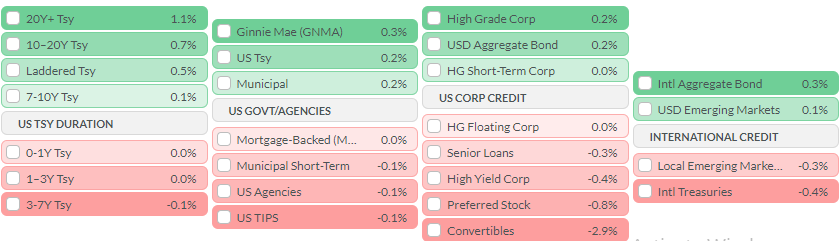

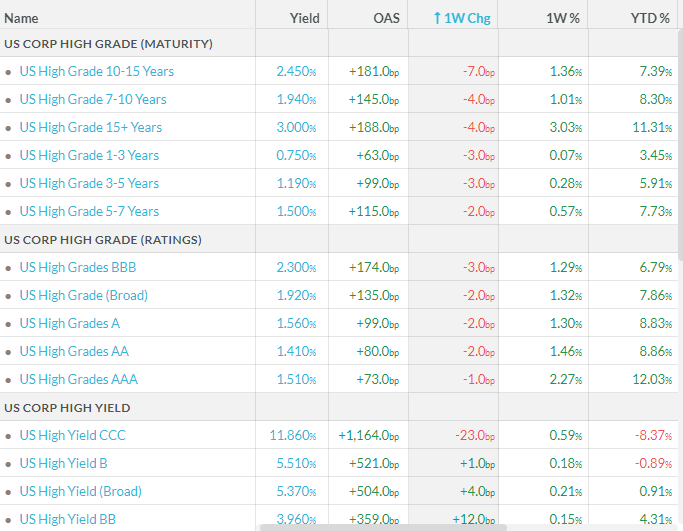

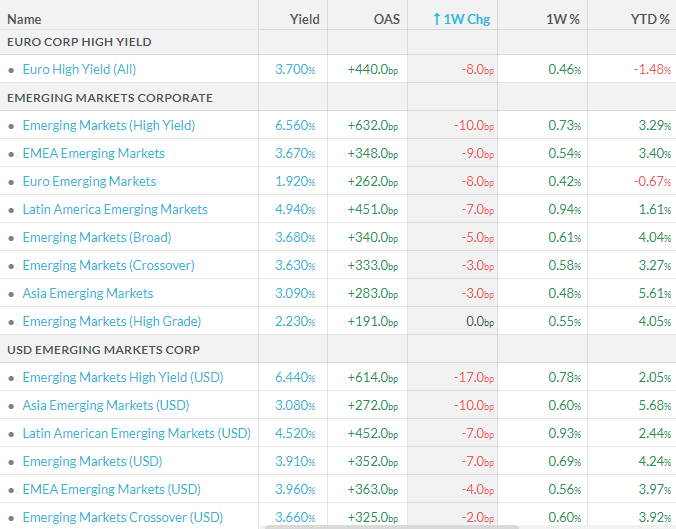

**HIGHLIGHTS:**

- The week under review saw US Treasuries end stronger due to several factors that included release of private payroll processor ADP’s weaker-than-expected job growth for August coupled with weaker equities and a need for safe-haven assets. Overall benchmark yields rallied between 3-15bps with the curve bullflattening sharply; with the long-ends much richer. The 2Y benchmark; reflective of interest rate predictions ended 2bps lower at 0.13% whilst the muchwatched 10Y (which traded within a wider 0.64%-0.75% range); rallied 11bps, to end the week at 0.64%. The Fed’s Beige book covering 12 Fed districts noted some modest increases in economic activity. Long-dated UST’s are expected to drift lower as investors show concern over the fragility of the US economy.


- As we shift into autumn, central bank policy continues to be the main fundamental driver of markets. While the ultra-accommodative monetary policy stance remains unchanged, Fed chairman Jerome Powell made some important announcements about the Fed’s overall framework at the annual Jackson Hole symposium. The shift to an average inflation targeting approach—under which the Fed will try to get inflation sustainably above 2%, to make up for the fact that it’s been below 2% for an extended period of time—was largely anticipated by the market, even if it was expected to come at a later date. 


- The more noteworthy incremental change is in the approach to the unemployment rate, with the Fed in future only responding to “shortfalls” and not “deviations”. In other words, a low unemployment rate will no longer push the Fed to raise rates. These changes solidify the Fed’s easy policy and remove the tail risk of a taper tantrum-like scenario for fixed income markets.


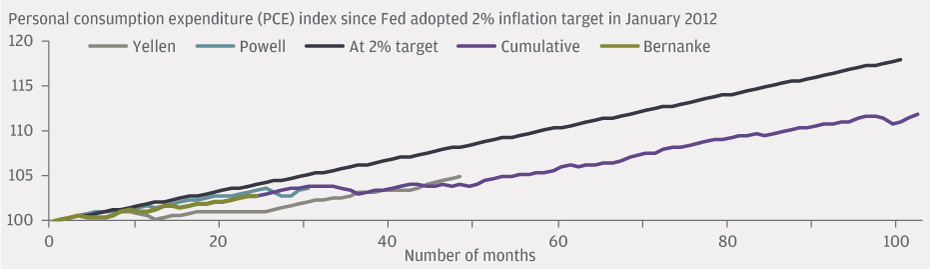


- In credit markets, spreads continued to compress throughout the summer: global high yield spreads tightened 27 bps in August to 520 bps, while global investment grade credit spreads moved 7 bps lower to 130 bps over the month. Barring a severe second wave of infections or disruption from geopolitics (such as US-China trade tensions or the US presidential election), expect credit spreads to grind tighter. (All data to 31 August.) This week, despite the equity rout, we saw credit spreads contract across EM with EM High Yield spread compressing the most ~17bps and Asia High Yield by ~10bps. In US Fixed Income however, BB spreads widened by ~12bps, while IG spreads were tighter by 2-7bps.




**ASIAN & EM CENTRAL BANKS ACTION UPDATE:**


**INDIA**

- India’s economy posted the biggest contraction among major economies last quarter, with gross domestic product shrinking 23.9% from a year earlier. India’s budget deficit breached the annual target four months into the fiscal year. The Reserve Bank of India stepped up measures to crack down on rising yields following a series of debt auctions. It said it will conduct 1.2 trillion rupees (USD 16 billion) worth of repurchase operations and Federal Reserve-style Operation Twists, while relaxing rules on bank ownership of debt. The RBI has said a stronger currency will help contain imported inflation, signaling it may tolerate gains in the rupee.


**BRAZIL**

- Brazil President Jair Bolsonaro is moving forward with a proposal to rein in the high cost of state employees in a nod to his economy minister’s austerity agenda. One-year breakevens climbed to the highest since January as faster-than-expected wholesale inflation increased bets consumer prices will pick up. **Brazil’s central bank is unlikely to lower the benchmark interest rate soon as inflation picks up in coming months amid heightened government spending, according to one of the institution’s board members**.  **Prosecutors are seeking to block Vale SA dividends as part of an intervention request to ensure the safety of the iron-ore giant’s tailings dams after a collapse last year.**


**INDONESIA**

- Indonesia’s parliament will consider possible sweeping changes to laws that could give the government more authority over the central bank. **Indonesia may continue to seek the central bank’s help in financing its budget deficit through 2022 if it’s needed, according to President Joko Widodo**. Government is opposed to a proposal to set up a monetary board to dilute central bank independence while counting on Bank Indonesia’s continued role in funding the fiscal deficit, a senior minister said. **Indonesia's sovereign bond yields surged the most relative to others i.e. ~+9bps this week.** 

**TURKEY**

- **Turkey’s trade gap surged to the highest in more than two years in August, driven by a fivefold rise in gold imports as currency depreciation set off weeks of frenzied precious metal purchases**. Consumer inflation was little changed in August despite the lira’s weakening to a record low against the dollar. The economy fared better than forecast by analysts as the government contained the damage from the coronavirus pandemic with a campaign of stimulus that came at the cost of destabilizing the lira. 


- GDP last quarter shrank 9.9% from a year earlier Turkey condemned the U.S. for easing a decades-old arms embargo on Cyprus. It said it would continue to turn to other providers of air-defense weapons if traditional western allies fail to deliver. Turkey sovereign bond yields compressed by 8bps this week.


**ARGENTINA**

- **Argentina’s new dollar bonds are yielding about 11% in unofficial, over-the-counter trading as the country finalizes a USD 65 billion debt restructuring and emerges from default for the third time this century**. The nation must reduce its bond yields as it will take time for the government to return to capital markets, Economy Minister Martin Guzman said.


- Argentina’s coronavirus crisis is getting worse, piling problems onto a government that just restructured billions of dollars of debt. Almost 47% of people tested get a positive result back. Argentines have been buying U.S. dollars at a record pace as the peso loses value. The economic recovery cooled in July amid a stricter Covid-19 quarantine and heightened uncertainty about President Alberto Fernandez’s policies.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [42]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [43]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [44]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [45]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [46]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- **USD:** : The dollar index edged down 0.1% to around 92.752 on Friday, having touched a one-week high earlier in the session Friday and following three sessions of gains, as risk assets gained ground in afternoon trading with US stocks recovering from a one-month low. The US jobs report showed the economy added 1.371 million jobs in August while the unemployment rate dropped to 8.4%, beating market forecasts of 9.8%. On the week, the dollar gained 0.4%, as economic data for the US released during the week offered the dollar some support: the ISM manufacturing PMI reached the highest in near 2 years and vehicle sales returned to pre-pandemic levels.



- **EUR**:  EUR/USD has been in a consolidation mode for most of the week, being in a weekly range of 1.1754 to 1.1901. This comes as Eurozone PMI (51.6 vs. 54.9 prior) showed a more subdued pace of pickup in August compared to July. Levels are stretched, and 1.20 will likely be a psychological resistance to overcome. Risk aversion may taper EUR gains. This is particularly as cases in Europe are climbing, and may derail current recovery.



- **GBP**:  GBP/USD came off from a high of 1.3482 on the first day of the month, to sub1.33 levels. This was soured by poor market sentiments. Services PMI stayed positive, although Covid-19 second waves are affecting sentiments. Being a smaller and open economy, the UK is vulnerable to global downside risks. Industrial production for July is the pick of the bunch of data for the coming week. 


- **JPY**:  USD/JPY was mostly in a bid tone over the past week, stretching to 106.5 levels from 105.3 levels on 28 August. The job to applicant ratio continues to fall, highlighting at challenging labour market conditions. Markets repricing policy shifts in Japan, and the next Prime Minister may be pivotal in shaping JPY expectations. For the coming week, the eco watchers survey and core machinery orders are released, and may provide small updates to economic outlook. 


- **AUD**: AUD/USD moved down in an linear fashion since 1 September, after the high of 0.7414. After falling to around 0.727 levels, pair was clearly affected by risk aversion. This comes as RBA increased and extended its lending facility. GDP numbers were also poorer than expected. Australia and China relations remain sour at this stage. Global sentiments will be key to AUD’s fate over the coming week.


- **BRL**: The Brazilian real touched 5.24 per USD for the first time since August 5th boosted by hopes of an economic recovery as domestic figures showed car production and sales rose in August, the latest in a series of data to signal a pickup in business activity. Also, PMI data released this week showed the country’s private sector activity returned to expansion as the economy continues to recover from coronavirus lockdowns. At the same time, Brazil's government presented to congress a constitutional reform bill on Thursday aimed at simplifying and reducing the cost of its public sector, which gives the president sweeping powers to eliminate public sector jobs and bodies without congressional approval.


- **MXN**: The Mexican peso touched a three-month high of 21.49 per USD, as latest domestic data showed consumer confidence rose for the third consecutive month in August amid the gradual easing of coronavirus lockdown restrictions. On August 13th, Mexico’s central bank slashed its benchmark interest rate by 50bps to a four-year low of 4.5%, flagging a rise in inflation before the year ends and downside risks to the economy.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [47]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [48]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

def comd_data(commodity):
    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    df = pd.DataFrame(df)
    df.columns = [commodity]
    return df

df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
df.index.name='Date'

for i in range(len(comds)):
    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

df = df.ffill().dropna()
df.to_excel('comd1.xlsx')

In [50]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [51]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [52]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [53]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**


- **WTI Crude** settled 3.8% lower at USD 39.77 per barrel on Friday, its lowest close since July 9th amid a stronger dollar after the US jobs report showed the unemployment rate fell more than anticipated and payrolls were roughly in line with forecasts. Meanwhile, falling demand and oversupply concerns continue to weigh on investors' mood. On the week, WTI lost around 7.4%, the first weekly fall in five and the biggest drop since June.


- Next week, China will be releasing its monthly oil import numbers on Monday and will be watched closely to gauge the strength of oil demand in the country. Then we have EIA’s Short-Term Energy Outlook on Wednesday which will have its updated US oil production forecasts for this year and next. And there will be usual API and EIA weekly reports which will reflect the post-hurricane restarts activity.


- **Nickel**’s bull run hit the brakes with the London three-month prices dropping by over 3% Friday. The recent strong performance has made nickel the second-best performer in LME base metals complex on a year-to-date basis. According to SHMET, Chinese NPI (nickel pig iron) productions continued to fall in August (-9% MoM) as a result of cutbacks amid ore supply tightness. Tight ore supply has been one of the bull drivers behind the recent rally, and low inventory at Chinese ports may remain a case throughout the year.


- Turning to **copper**, data release from South America suggested that Chilean copper productions have grown by 1.4% YoY to 3.25 mln tonnes during the first seven months despite Covid-19 threats. July productions saw a decline of 5% YoY due to disruptions at several operations. According to SMM, Chinese bonded warehouses stocks have risen to 249.5kt at import arrivals, but they are getting slower to be cleared into the local market as demand hasn’t come out of a seasonal lull. Copper prices rose 2.24% this week.


- **Gold** fell a fourth straight day on Friday, losing 2% on the week and plumbing lows near USD 1,920 in a slide that raised questions on how much volatility was in store for the metal that hit USD 2,000 earlier in the week. Gold’s record-setting rally this year is tied to the barrage of stimulus fired off by central banks to fight the impact of the pandemic, and next week the focus is on the European Central Bank. In the run up, gold’s traded in the USD 1,900s, while flows into bullion-backed funds have slowed. The backdrop to Thursday’s decision is a mixed economic picture, rising friction over exchange rates, plus the Federal Reserve’s new policy framework that tolerates higher inflation.


- **Palladium** was the top performer in Metals, up +5.76% on the week. Top platinum-mining executives will have a virtual one-day gathering on Wednesday to discuss the industry’s future at a time when they’re getting serious about returning cash to investors. South African producers are increasingly looking to resume or increase dividends even as coronavirus uncertainty lingers and the country’s economy remains under pressure. Investors will hear from Sibanye Stillwater Ltd., Impala Platinum Holdings Ltd., Anglo American Platinum Ltd., as well as Russia’s MMC Norilsk Nickel PJSC.

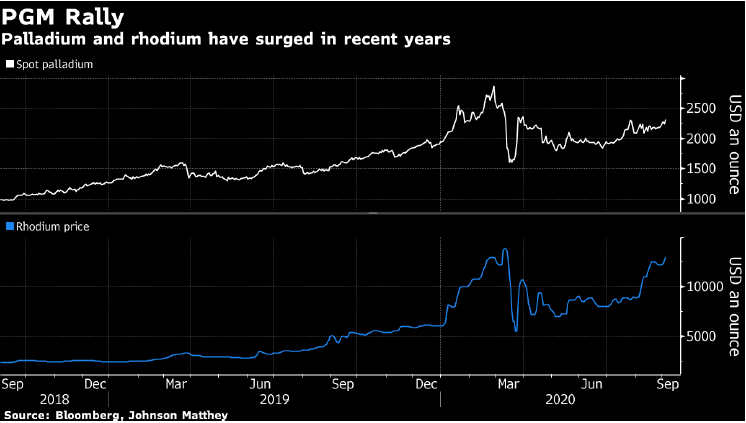

- The companies -- many of which have struggled with high costs, power cuts and a difficult regulatory environment -- are now reaping the benefits of tightening markets. Robust demand from autocatalyst makers has also helped boost palladium and rhodium prices, and mining companies’ inability to raise output quickly means they will likely remain supported. Also, the World Platinum Investment Council issues supply-and-demand estimates Tuesday.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

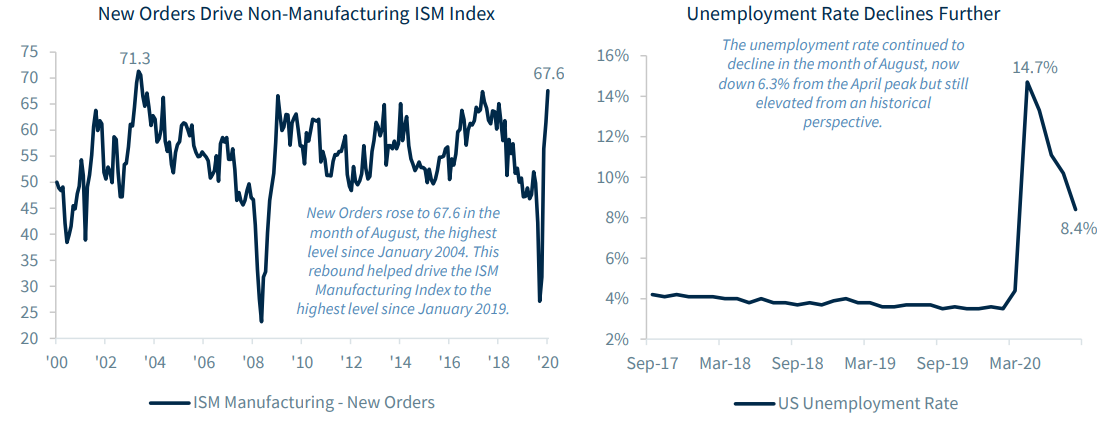

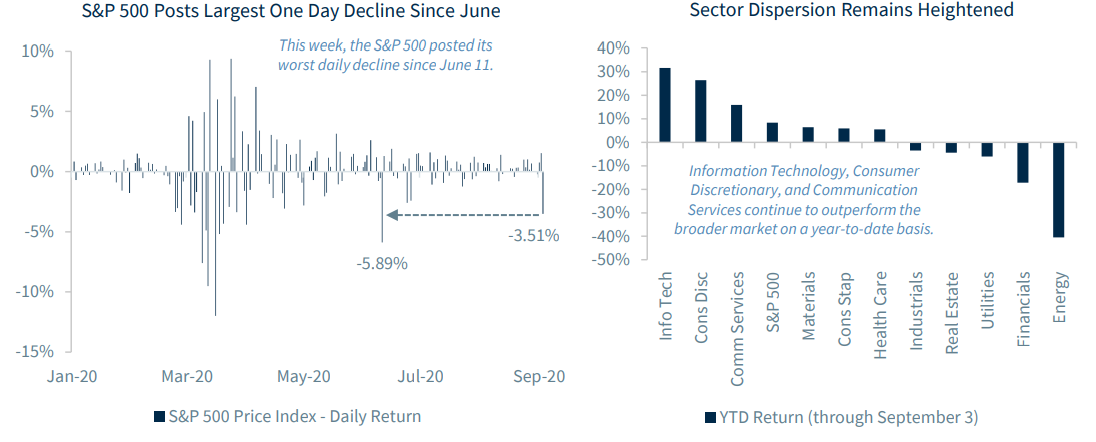

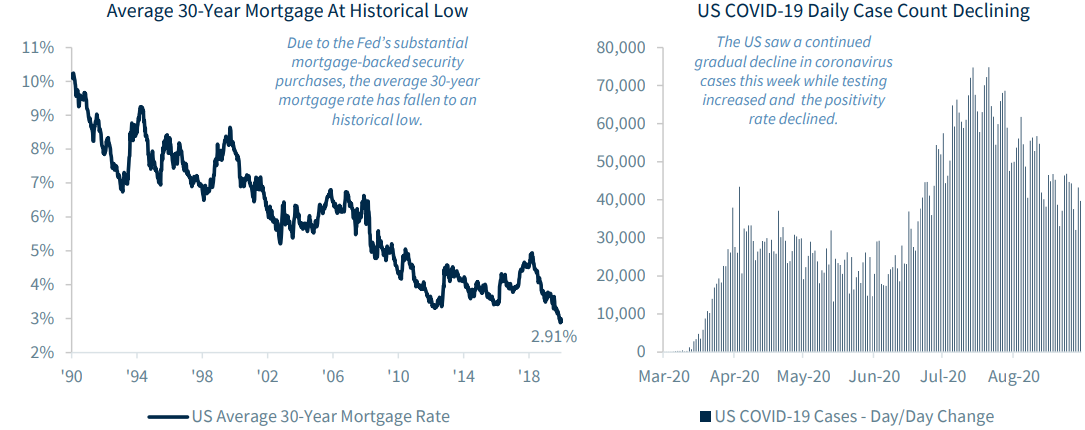

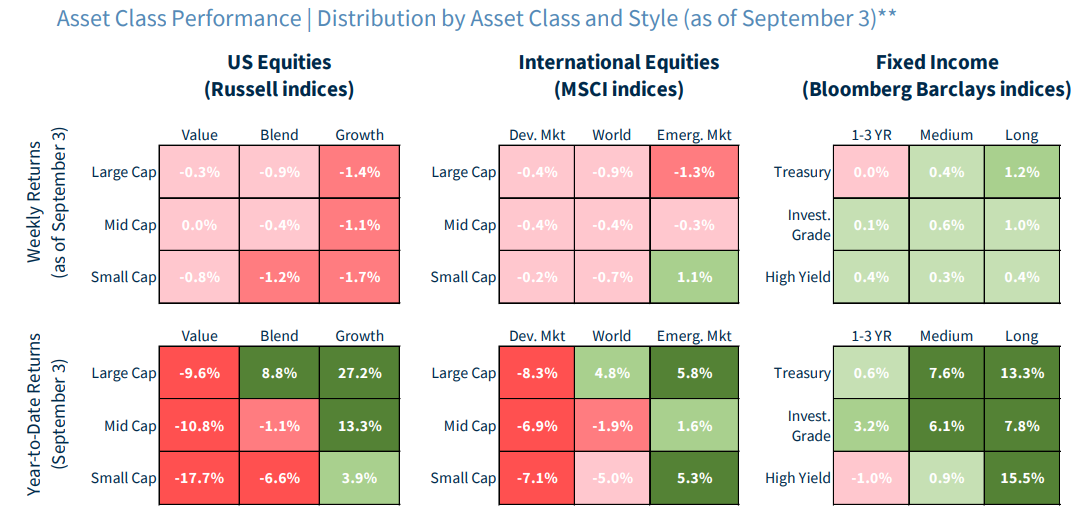

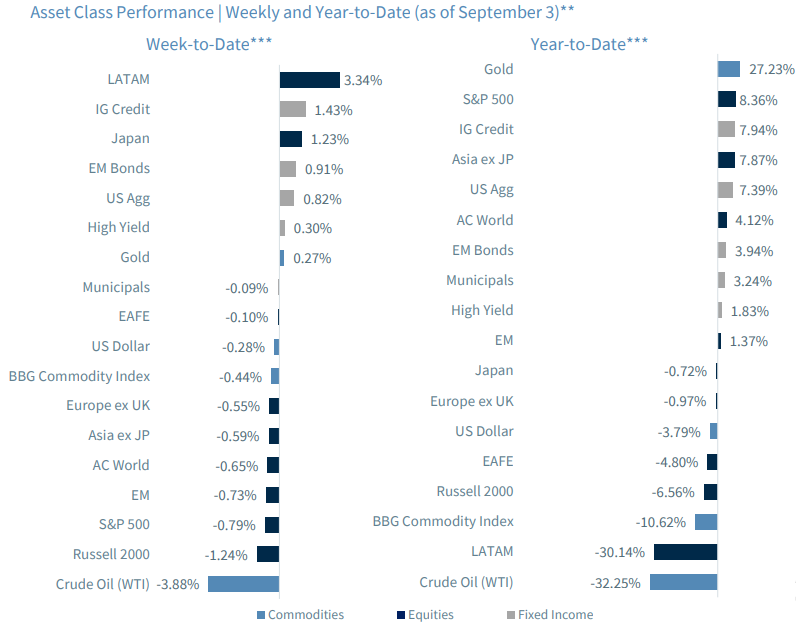

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [54]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)